## Step 1: Uploading the Dataset

We begin by uploading the dataset to the Colab environment. The dataset should be in ZIP format (e.g., `shoe_data.zip`) and contain labeled images of different footwear types (shoes, sandals, boots). This step uses Colab’s file upload interface to load the data into the runtime.


Kaggle Dataset :[Boot-Shoe-Sandal](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images)

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select the ZIP file (e.g., shoe_data.zip)

In [ ]:
import zipfile
import os

# Replace 'shoe_data.zip' with the name of your ZIP file
zip_path = "/content/archive.zip"
extract_path = "/content/dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print("Extracted folders:", os.listdir(extract_path))

Extracted folders: ['Shoe vs Sandal vs Boot Dataset']


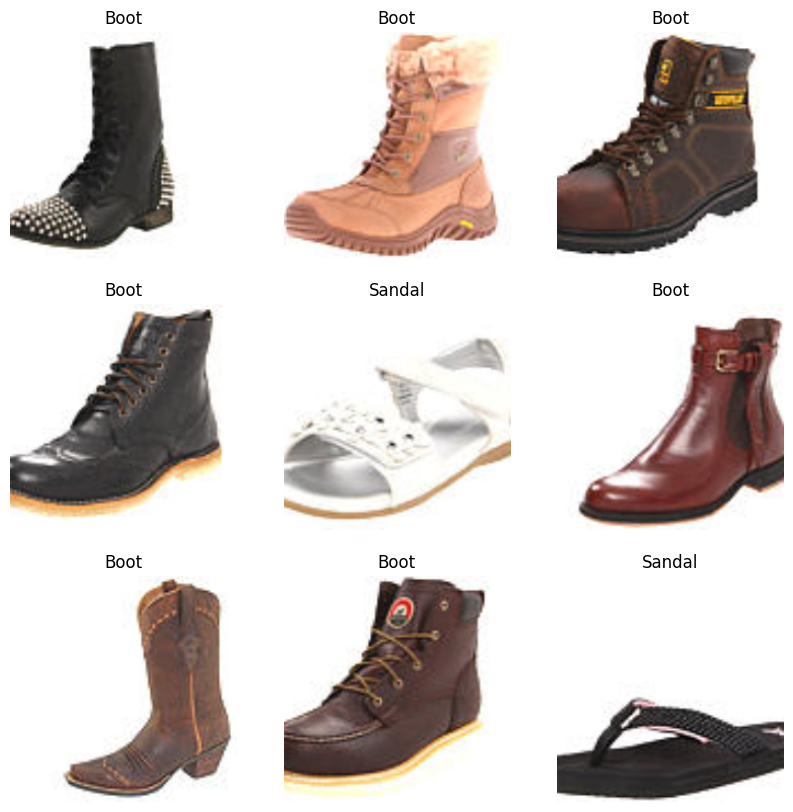

In [ ]:
from fastai.vision.all import *

# Path to the dataset
path = Path("/content/dataset")

# Loading the dataset with FastAI
dls = ImageDataLoaders.from_folder(
    path,
    train=".",   # Use the main folder for training
    valid_pct=0.2,  # 20% of data for validation
    item_tfms=Resize(224)
)

dls.show_batch(max_n=9, figsize=(10, 10))

In [ ]:
# Load a pre-trained ResNet34 model
learn = vision_learner(dls, resnet34, metrics=accuracy)

# Fine-tune the model for 5 epochs
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 94.3MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.284767,0.146102,0.951333,1:03:00


epoch,train_loss,valid_loss,accuracy,time
0,0.088833,0.042266,0.986667,1:33:52


epoch,train_loss,valid_loss,accuracy,time
0,0.088833,0.042266,0.986667,1:33:52
1,0.038523,0.023628,0.992333,1:33:40
2,0.013801,0.020482,0.993000,1:33:28


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
learn.export('/content/drive/My Drive/shoe_model.pkl')

Mounted at /content/drive
